In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from heka_reader import Bundle

import numpy as np
import operator
import math

plt.rcParams['figure.figsize'] = (20, 12)

In [2]:
off_alpha = r'C:\Users\tomlinsa\Downloads\Alex_stim\spike_analysis\data\R2P_160817_01-jump_offalpha.dat'

In [3]:
bundle = Bundle(off_alpha)
data = bundle.data

In [103]:
series1_sweeps = [0, 1, 2]
indices = [[0, 0, sweep, 0] for sweep in series1_sweeps]

series2_sweeps = [0, 1]
indices += [[0, 1, sweep, 0] for sweep in series2_sweeps]

series4_sweeps = [0, 1]
indices += [[0, 3, sweep, 0] for sweep in series4_sweeps]

In [104]:
traces = [data[index] for index in indices]

In [91]:
def get_spike_indices(trace, edge, num_stds):
    """
    Gets indices of spikes in extracellular recordings.
    Adapted from Bartosz Telenczuk: https://github.com/btel/SpikeSort
    """
    thresh = np.std(trace) * num_stds
    
    op1, op2 = operator.lt, operator.gt
    
    edges = ['rising', 'falling']
    
    assert edge in edges
    if edge == 'falling':
        op1, op2, = op2, op1
        thresh = -thresh
    
    i, = np.where(op1(trace[:-1], thresh) & op2(trace[1:], thresh))
    
    return i

In [105]:
spike_indices = [get_spike_indices(trace, 'falling', 4) for trace in traces]
num_spikes = [len(spike_index) for spike_index in spike_indices]

In [134]:
def fit_sine_polar(x, y):
    """
    Fits a sine wave with a frequency of 1 to data from a polar plot.
    Adapted from Ed Tate: http://exnumerus.blogspot.com/2010/04/how-to-fit-sine-wave-example-in-python.html
    """
    rows = [[np.sin(t), np.cos(t), 1] for t in x]
    
    a = np.matrix(rows)
    b = np.matrix(y).T
    
    w = np.linalg.lstsq(a, b)[0]
    
    phase = math.atan2(w[1, 0], w[0, 0])
    amplitude = np.linalg.norm([w[0, 0], w[1, 0]], 2)
    bias = w[2, 0]
    
    return (phase, amplitude, bias)

25.37967700457656

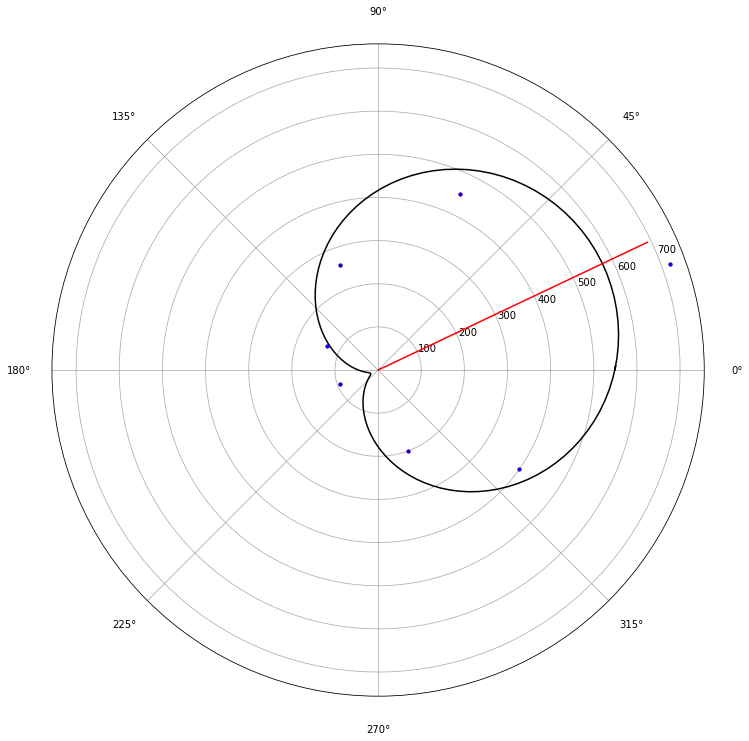

In [141]:
# FAKE DATA
directions2 = np.array([20, 65, 110, 155, 200, 290, 325]) / 180 * math.pi
num_spikes2 = np.array([720, 450, 260, 130, 95, 200, 400])

plt.polar(directions2, num_spikes2, '.r')

phase, amplitude, bias = fit_sine_polar(directions2, num_spikes2)

xs = np.arange(0, 2*math.pi+0.05, 0.05)
y_est = amplitude * np.sin(xs + phase) + bias

plt.polar(xs, y_est, '-k')
plt.polar(directions2, num_spikes2, '.b')

pref_dir = math.pi / 2 - phase
pref_est = amplitude * math.sin(pref_dir + phase) + bias

plt.polar([pref_dir, 0], [pref_est*1.2, 0], '-r')
pref_dir / math.pi * 180

6.979405610015338

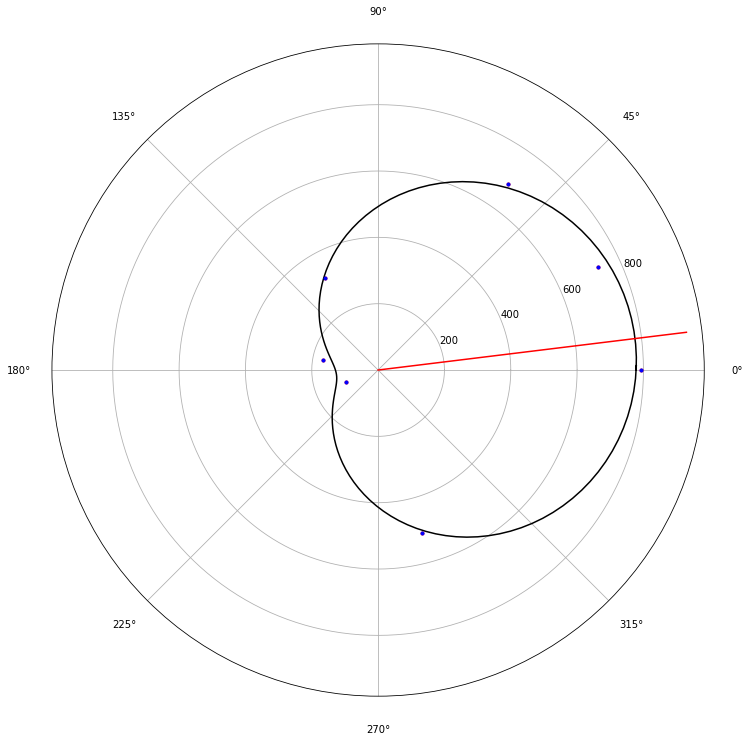

In [142]:
directions = np.array([0, 25, 55, 120, 285, 200, 170]) / 180 * math.pi
assert len(directions) == len(num_spikes)

# REAL NON DS DATA
plt.polar(directions, num_spikes, '.r')

phase, amplitude, bias = fit_sine_polar(directions, num_spikes)

xs = np.arange(0, 2*math.pi+0.05, 0.05)
y_est = amplitude * np.sin(xs + phase) + bias

plt.polar(xs, y_est, '-k')
plt.polar(directions, num_spikes, '.b')

pref_dir = math.pi / 2 - phase
pref_est = amplitude * math.sin(pref_dir + phase) + bias

plt.polar([pref_dir, 0], [pref_est*1.2, 0], '-r')
pref_dir / math.pi * 180